 <h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Python Assignment 2 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Simple Regression and Summary Stats</h2>

In [343]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
# change decimal places to 3
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Question 1
In this exercise we will be interested in study the relationship between average earnings and education levels, using the data set from the 1992 and 2008 Current Population Survey (CPS). Specifically, we want to see whether the average hourly earnings (`ahe`) are different between workers with a bachelor degree and those with only high school diploma (`bachelor`). Use the data provided in Canvas to respond the following questions.

a. How many observations are in this data set?

In [344]:
# read data
df = pd.read_excel('cps92_08.xlsx')
df.head()

,year,ahe,bachelor,female,age
0,1992,11.189,1,0,29
1,1992,10.000,1,0,33
2,1992,5.769,0,0,30
3,1992,1.562,0,0,32
4,1992,14.957,1,0,31


Answer to question 1:

In [345]:
num_observation = df.shape[0]
num_observation
print(f"There are {num_observation} observations in this data set")

There are 15316 observations in this data set


b. Compute the sample mean for average hourly earnings (`ahe`) in 1992 and in 2008. 

In [346]:
# your code goes here
mean_ahe_1992 = np.mean(df[df['year'] == 1992]['ahe'])
mean_ahe_2008 = np.mean(df[df['year'] == 2008]['ahe'])

print(f"Mean AHE in 1992 is {mean_ahe_1992}")
print(f"Mean AHE in 2008 is {mean_ahe_2008}")



Mean AHE in 1992 is 11.626365163889
Mean AHE in 2008 is 18.97609235893782


c. In order to make a right comparison between the values of earning in 2008 and 1992, we should adjust adjust the average hourly earnings in the 1992 dollars to the 2008 dollars with the inflation rate, computed as 

$$\frac{CPI_{2008}}{CPI_{1992}}$$

Consider that those values are equal to 140.3 for 1992 and 215.2 for 2008. Repeat the item above consering this adjusted value for 1992.

In [347]:
# Define the CPI values for 1992 and 2008
cpi_92 = 140.3
cpi_08 = 215.2

# Calculate the inflation adjustment factor
inflator = cpi_08 / cpi_92

# Apply inflation adjustment to the 'ahe' column
df['[ahe_adj]'] = df.apply(lambda row: row['ahe'] * inflator 
                          if row['year'] == 1992 
                          else row['ahe'], axis = 1)
mean_ahe_adj_92 = df[df['year'] == 1992]['[ahe_adj]'].mean()
print(f"The mean average hourly earning in 1992 adjust to the 2008 with inflation rate is {mean_ahe_adj_92}")

The mean average hourly earning in 1992 adjust to the 2008 with inflation rate is 17.83317022999938


d. Compare in a table how many female students has bachelor degree 1992 vs 2008? 

In [348]:
fem_bac_92 = df[(df['female'] == 1)&(df['year'] == 1992)&(df['bachelor'] == 1)]
fem_bac_08 = df[(df['female'] == 1)&(df['year'] == 2008)&(df['bachelor'] == 1)]
comparison_table = pd.DataFrame({
    'Year': [1992, 2008],
    '# of Female with bachelor': [len(fem_bac_92), len(fem_bac_08)]
})
print(comparison_table.to_string(index=False))



 Year  # of Female with bachelor
 1992                       1368
 2008                       1871


e. Create 2 boxplot to compare the distribution of average hourly earnings between high school graduates and college graduates for 1992 and 2008, respectively. What can you say about these two graphs? the distributios are changed between these 2 years?

(0.0, 82.4175796508789)

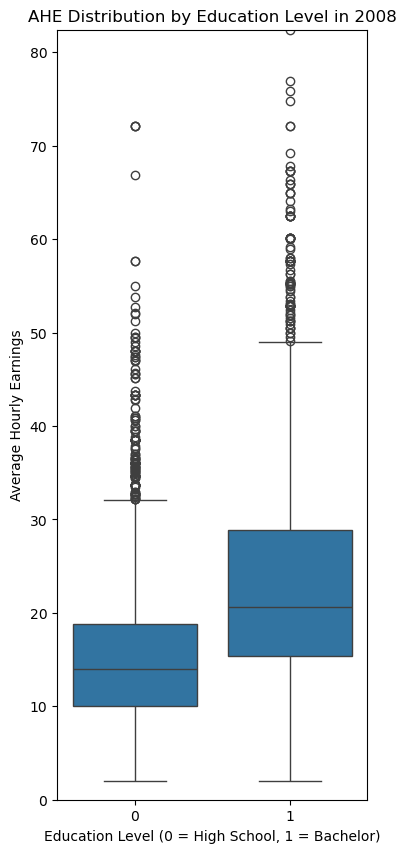

In [349]:
# Select data for the year 2008
cps08 = df[df['year'] == 2008][['year', 'ahe', 'bachelor']]

# Create a boxplot using seaborn
y_limit = df['ahe'].max()
plt.figure(figsize=(4, 10))
sns.boxplot(x=cps08['bachelor'], y=cps08['ahe'])
plt.title("AHE Distribution by Education Level in 2008")
plt.xlabel("Education Level (0 = High School, 1 = Bachelor)")
plt.ylabel("Average Hourly Earnings")
plt.ylim(0, y_limit) 

(0.0, 82.4175796508789)

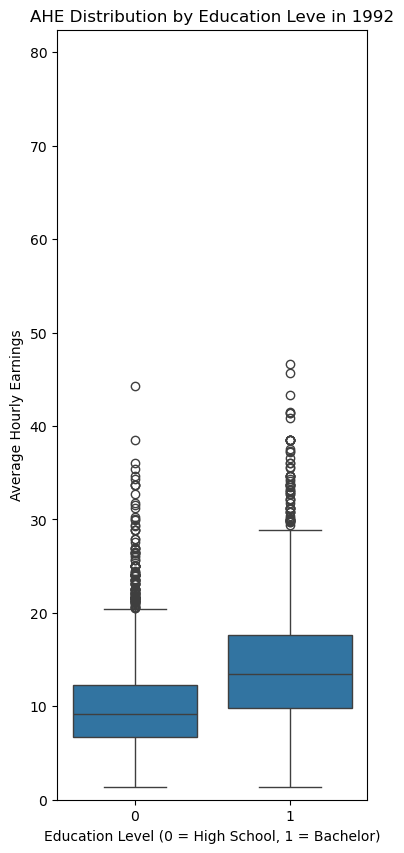

In [350]:
# Select data for the year 1992
cps92 = df[df['year'] == 1992][['year', 'ahe', 'bachelor']]

# Create a boxplot using seaborn
plt.figure(figsize=(4, 10))
sns.boxplot(x=cps92['bachelor'], y=cps92['ahe'])
plt.title("AHE Distribution by Education Leve in 1992")
plt.xlabel("Education Level (0 = High School, 1 = Bachelor)")
plt.ylabel("Average Hourly Earnings")
plt.ylim(0, y_limit) 

Text Answer: From the 2 graphs, I first noticed the overall income level increased since 1992.  We can also see that the median earning gap between bachelor and nonbachelor increased from 1992 to 2008. And the outlier become bigger for 2008. Overall, the distribution shift upward from 1992 to 2008.

## Question 2

Using the same dataset CPS92_08, respond the following questions. In this exercise, the relationship between a worker's age and his or her wage income will be investigated. (Generally, older workers have more work experience, which leads to higher productivity and income).

a. Make a scatter plot of AHE (average hourly earnings adjusted) vs. age, add a regression line to it. Does the graph suggest any relationship between the two?

*Hint: See our handout for the graph with a regression line added to it.*


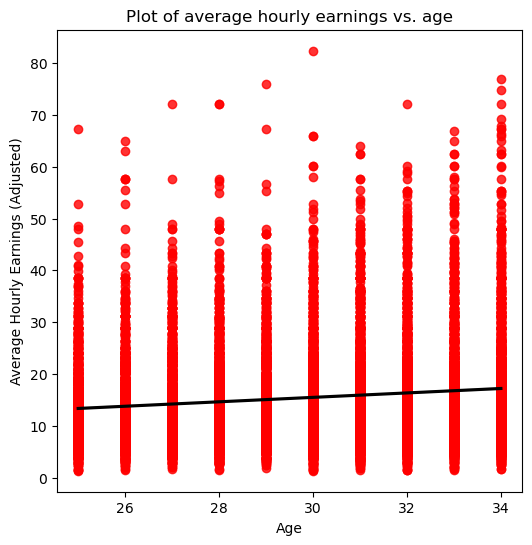

In [351]:
plt.figure(figsize=(6, 6))
sns.regplot(x=df['age'], y=df['ahe'], scatter_kws={'color': 'red'}, line_kws={'color': 'black'})
plt.title("Plot of average hourly earnings vs. age")
plt.xlabel("Age")
plt.ylabel("Average Hourly Earnings (Adjusted)")
plt.show()

There is a weak postitive relationship between earning and age. But it is really weak, not worth do analyze based on this single variable.

b. Make a scatter plot of the AHE vs Female. Does the graph suggest any relationship between the two?

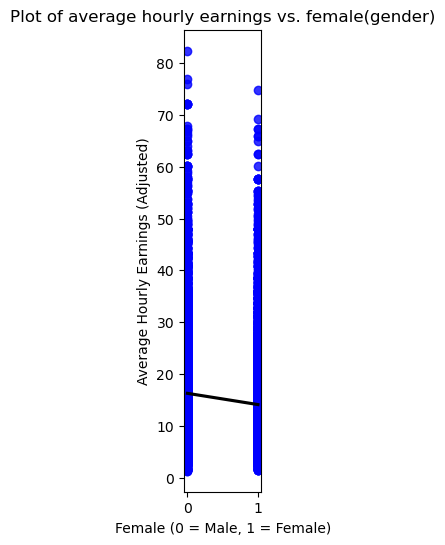

In [352]:
plt.figure(figsize=(1, 6))
sns.regplot(x=df['female'], y=df['ahe'], scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})
plt.title("Plot of average hourly earnings vs. female(gender)")
plt.xlabel("Female (0 = Male, 1 = Female)")
plt.ylabel("Average Hourly Earnings (Adjusted)")
plt.show()

There is a obvious relationship, the slope of the line is downward indicating that being a female on average earns less compare to being a male.

c. Repeat graphs a)-b), but use $ln(ahe\_adj)$. How do your answers change when using the logarithm?

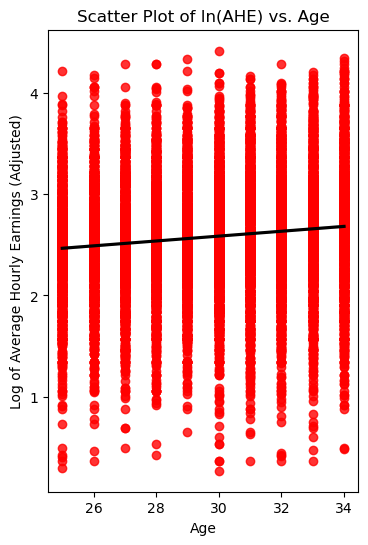

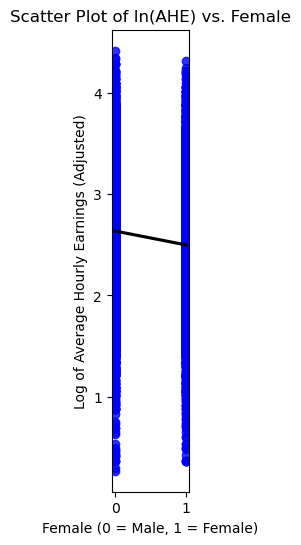

In [353]:
df['ln_ahe'] = np.log(df['ahe'])
plt.figure(figsize=(4, 6))
sns.regplot(x=df['age'], y=df['ln_ahe'], scatter_kws={'color': 'red'}, line_kws={'color': 'black'})
plt.title("Scatter Plot of ln(AHE) vs. Age")
plt.xlabel("Age")
plt.ylabel("Log of Average Hourly Earnings (Adjusted)")
plt.show()
plt.figure(figsize=(1, 6))
sns.regplot(x=df['female'], y=df['ln_ahe'], scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})
plt.title("Scatter Plot of ln(AHE) vs. Female")
plt.xlabel("Female (0 = Male, 1 = Female)")
plt.ylabel("Log of Average Hourly Earnings (Adjusted)")
plt.show()

The positive effect of age on earnings becomes clearer. The gender wage gap remains, but is now more interpretable in percentage terms. 

d. Now let's use the data to estimate the following equation
$$ ln(ahe \_adj) = \beta_0 + \beta_1 * age + u$$
Estimate this equation using the step by step method learned in class, and just the OLS command. What is your interpretation of your results?

Interpret

In [354]:
x=df['age']
y=df['ln_ahe']
sumy = np.sum(y - np.mean(y))
sumxy = np.sum((x - np.mean(x))*(y - np.mean(y)))
sumx2 = np.sum((x - np.mean(x))**2)
sumy2 = np.sum((y - np.mean(y))**2)
x_bar = np.mean(x)
y_bar = np.mean(y)
# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar-b1*x_bar

print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 0.02396987235053428

b0: 1.8658438951994505



Beta1 is 0.02 indicating the variable age has a weak positive effect on wage. 

e. Run a regression between the logarithm of average hourly earnings, `ln(AHE_adj)`, and `age`. In this item you are allowed to use `ols()` command from `statsmodels`. What is your interpretation of your results?

In [355]:
model2 = smf.ols(formula="ln_ahe ~ age", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_ahe   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     228.8
Date:                  周六, 22 2月 2025   Prob (F-statistic):           2.54e-51
Time:                        00:07:54   Log-Likelihood:                -12723.
No. Observations:               15316   AIC:                         2.545e+04
Df Residuals:                   15314   BIC:                         2.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8658      0.047     39.540      0.000       1.773       1.958
age            0.0240      0.002     15.126      0.000       0.021       0.027
==============================================================================
Omnibus:                      113.910   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.626
Skew:                          -0.173   Prob(JB):                     5.26e-28
Kurtosis:                       3.278   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Beta1 is 0.02 indicating the variable age has a weak positive effect on wage. R^2 is low indicating the single variable age is not a reasonable explaination of how wage changes.


**THE CALIFORNIA TEST SCORE DATA SET**

See the documentation about the California Test dataset 

* Take a look at the variables in this data set
* Choose two variables a Y dependent and an X independent variable for which you could run a regression. Please explain why you chose these two variables and your intuition about their relationship. (Positive or negative and why.)
* Show the correlation coefficient of these two variables.
* Show a graph plotting the relationship between these two.
* Write your regression equation
* Estimate your regression, show and interpret your results. Are these what you were expecting.?
* TRY YOUR BEST TO DO THIS WITHOUT THE HELP OF AI, FOLLOW STEPS FROM HANDOUTS 
    

## We first read data and look it

In [356]:
cal = pd.read_stata('caschool13.dta')
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   observation_number  420 non-null    float32
 1   dist_cod            420 non-null    float32
 2   county              420 non-null    object 
 3   district            420 non-null    object 
 4   gr_span             420 non-null    object 
 5   enrl_tot            420 non-null    float32
 6   teachers            420 non-null    float32
 7   calw_pct            420 non-null    float32
 8   meal_pct            420 non-null    float32
 9   computer            420 non-null    float32
 10  testscr             420 non-null    float32
 11  comp_stu            420 non-null    float32
 12  expn_stu            420 non-null    float32
 13  str                 420 non-null    float32
 14  avginc              420 non-null    float32
 15  el_pct              420 non-null    float32
 16  read_scr

## We choose computer and math score, I am interested! I suppose computer would help students learn math!

In [357]:
# show the correlation coefficient
cal[['computer', 'math_scr']].corr()

,computer,math_scr
computer,1.000,-0.033
math_scr,-0.033,1.000


## Now I would make a plot based on it showing their relation


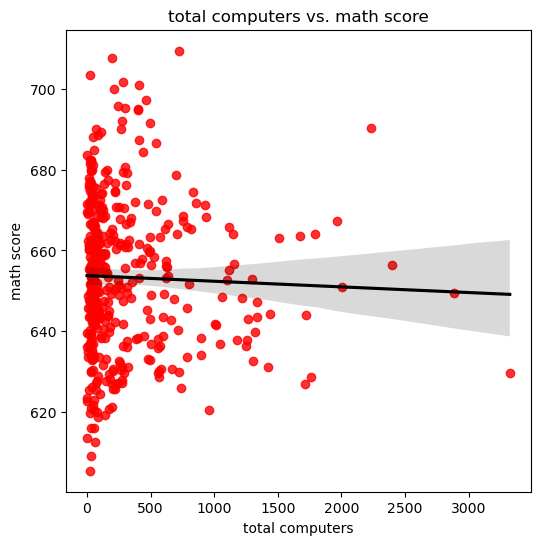

In [358]:
plt.figure(figsize=(6, 6))
sns.regplot(x = 'computer',y = 'math_scr', data = cal, scatter_kws={'color': 'red'}, line_kws={'color': 'black'})
plt.title('total computers vs. math score')
plt.xlabel('total computers')
plt.ylabel('math score')
plt.show()

## Get formula

In [359]:
x = cal['computer']  
y = np.log(cal['math_scr'])
data = {'x': x, 'y': y}
data = pd.DataFrame(data)
cov_xy = np.cov(data.x, data.y)[1, 0]
var_x = np.var(data.x, ddof=1)
x_bar = np.mean(data.x)
y_bar = np.mean(data.y)
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: -2.1048108299453247e-06

b0: 6.482330401832134



$$ mathscore = 648.233 - 2.10 * computer + u$$

In [360]:
reg = smf.ols(formula = "computer ~ math_scr", data = cal)
results = reg.fit()
print(f'estimate the regression: \n{results.params}')

estimate the regression: 
Intercept   809.992
math_scr     -0.775
dtype: float64


There is a negative relationship between number of computers and the math score as the beta 1 is negative, however, as beta one is really small (-2.10 * 10^-6), I don't really think there is a relation between them.

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>


&nbsp;

In [363]:
!jupyter nbconvert --to html Econ320Lab_Assign2_empty.ipynb

[NbConvertApp] Converting notebook Econ320Lab_Assign2_empty.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 656395 bytes to Econ320Lab_Assign2_empty.html
